In [8]:
import pandas as pd
# import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import calendar

In [9]:
# Windows OS 
# mergeddf = pd.read_csv('..\data\joint_public_data_2022.csv')

In [10]:
# iOS
# mergeddf = pd.read_csv('../../DataCollection/joint_public_data_2022.csv')
mergeddf = pd.read_csv('../data/joint_public_data_2022.csv')

/var/folders/3f/0w5y80cn6wj986lwfb84fv540000gn/T/ipykernel_21960/1329292024.py:3: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  mergeddf = pd.read_csv('../data/joint_public_data_2022.csv')


In [11]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [12]:
dp_copy = mergeddf.copy()

In [13]:
dp_copy.columns

Index(['SRCategory', 'SRType', 'SRPriority', 'SRSource', 'SRStatus',
       'SRResolution', 'BoroughCode', 'CommunityBoard',
       'ServiceRequestParentGlobalID', 'GlobalID', 'InitiatedDate',
       'SRClosedDate', 'SRCreatedDate', 'SRUpdatedDate', 'Descriptor1',
       'ComplaintType', 'CallerZipCode', 'SRCallerType', 'Latitude',
       'Longitude', 'Census Tract', 'NTA', 'Zip Codes 2', 'SRGlobalID',
       'InspectionType', 'InspectionStatus', 'InspectionTPCondition',
       'InspectionTPStructure', 'TreePointDBH', 'InsGlobalID',
       'InspectionDate', 'InsClosedDate', 'InsCreatedDate', 'InsUpdatedDate',
       'ParentInspectionGlobalID', 'ReinspectionDate', 'Location', 'WOType',
       'WOStatus', 'WOPriority', 'Borough', 'WOGlobalID', 'WOClosedDate',
       'CancelDate', 'CancelReason', 'WOCreatedDate', 'WOUpdatedDate',
       'WOEntity', 'PROJSTARTDATE', 'WOProject', 'WOCategory',
       'RecommendedSpecies', 'Location_WO', 'RADefect', 'RADefectLocation',
       'Failure', 'Imp

In [14]:
mergeddf['SRCreatedDate_datetime'] = pd.to_datetime(mergeddf['SRCreatedDate'],errors='coerce')
#for each month
count_by_month = mergeddf['SRCreatedDate_datetime'].apply(lambda row: row.month)
count_by_month = count_by_month.to_frame()
count_by_month.rename(columns={'SRCreatedDate_datetime' : 'SRCreated_month'}, inplace = "True")
count_by_month.groupby(["SRCreated_month"]).size()
mergeddf = mergeddf.join(count_by_month)

## SRs by Risks

In [15]:
# get count by source and month 
df = mergeddf.groupby(['SRCreated_month', 'SRSource']).size().unstack(level=1)
df['month'] = ['Jan' ,' Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# sum other categories
df['Others'] = df[['DOT','DPR','DPR -Public Tree Map','Department of Parks and Recreation - Public Web Site','FDNY']].sum(axis=1)

<AxesSubplot: xlabel='month'>

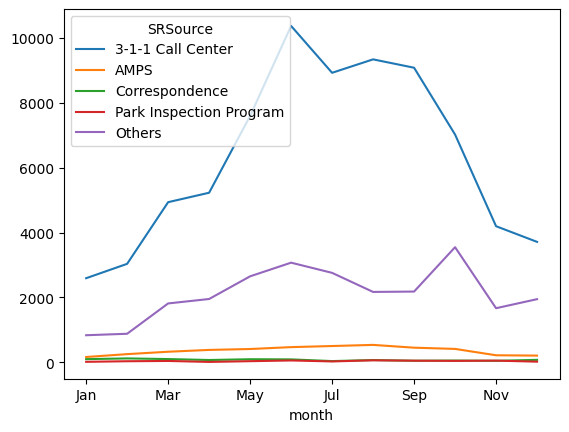

In [16]:
df.plot(x="month", y=['3-1-1 Call Center', 'AMPS', 'Correspondence','Park Inspection Program', 'Others'])

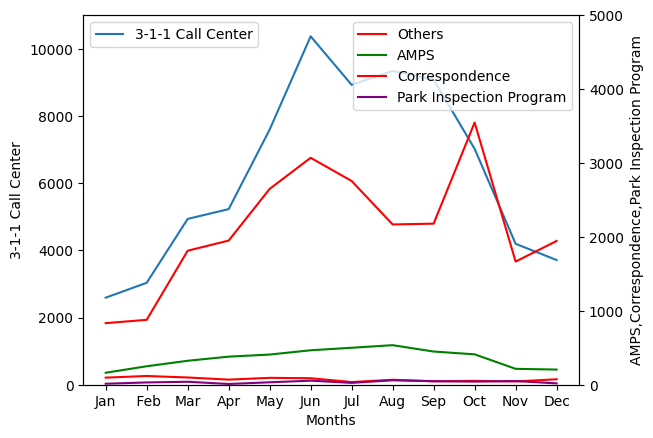

In [17]:
x = df['month']
y1 = df['3-1-1 Call Center']
y3 = df['AMPS']
y4 = df['Correspondence']
y5 = df['Park Inspection Program']
y2 = df['Others']

# create a figure and axis object
fig, ax1 = plt.subplots()

# plot the first line on the first y-axis
ax1.plot(x, y1, label='3-1-1 Call Center')
# ax1.plot(x, y2, label='Others')
# ax1.plot(x, y3, label='AMPS')
ax1.set_ylabel('3-1-1 Call Center')
ax1.set_xlabel('Months')

# create a second y-axis and plot the second line on it
ax2 = ax1.twinx()
ax2.plot(x, y2, color='red', label='Others')
ax2.plot(x, y3, color='green', label='AMPS')
ax2.plot(x, y4, color='red', label='Correspondence')
ax2.plot(x, y5, color='purple', label='Park Inspection Program')
ax2.set_ylabel('AMPS,Correspondence,Park Inspection Program')

# set the y-axis limits for the second y-axis to stretch the squeezed line
ax1.set_ylim(0, 11000)
ax2.set_ylim(0, 5000)

# add a legend for both lines
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1, labels1, loc =2)
ax2.legend(lines2, labels2, loc =1)

# show the plot
plt.show()

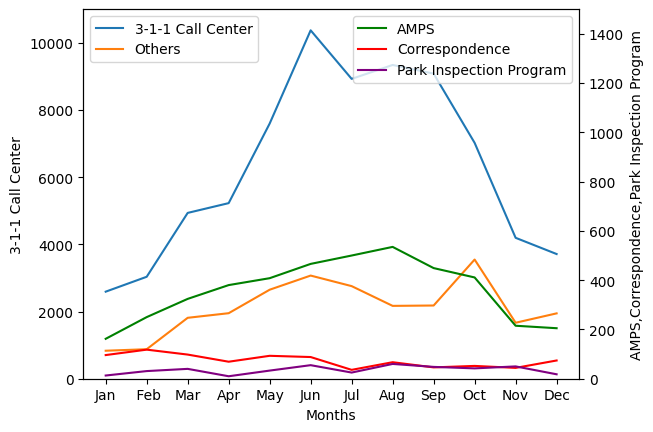

In [18]:
x = df['month']
y1 = df['3-1-1 Call Center']
y3 = df['AMPS']
y4 = df['Correspondence']
y5 = df['Park Inspection Program']
y2 = df['Others']

# create a figure and axis object
fig, ax1 = plt.subplots()

# plot the first line on the first y-axis
ax1.plot(x, y1, label='3-1-1 Call Center')
ax1.plot(x, y2, label='Others')
# ax1.plot(x, y3, label='AMPS')
ax1.set_ylabel('3-1-1 Call Center')
ax1.set_xlabel('Months')

# create a second y-axis and plot the second line on it
ax2 = ax1.twinx()
# ax2.plot(x, y2, color='red', label='Others')
ax2.plot(x, y3, color='green', label='AMPS')
ax2.plot(x, y4, color='red', label='Correspondence')
ax2.plot(x, y5, color='purple', label='Park Inspection Program')
ax2.set_ylabel('AMPS,Correspondence,Park Inspection Program')

# set the y-axis limits for the second y-axis to stretch the squeezed line
ax1.set_ylim(0, 11000)
ax2.set_ylim(0, 1500)

# add a legend for both lines
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1, labels1, loc =2)
ax2.legend(lines2, labels2, loc =1)

# show the plot
plt.show()

In [19]:
df_ins_by_risk = mergeddf[['InspectionDate','RiskRating','SRCreated_month']]
df_ins_by_risk = df_ins_by_risk.groupby(['SRCreated_month', 'RiskRating']).size().unstack()
df_ins_by_risk['month'] = ['Jan' ,' Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

In [20]:
df_ins_by_risk.columns

Index([3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 'month'], dtype='object', name='RiskRating')

## Requests yielding by Work Orders

In [21]:
mergeddf['WOCreatedDate'] = pd.to_datetime(mergeddf['WOCreatedDate'],errors='coerce')
mergeddf['WOCreatedDate_month'] = mergeddf['WOCreatedDate'].apply(lambda row: row.month)
mergeddf['Year'] = mergeddf['SRCreatedDate_datetime'].dt.year
mergeddf.groupby(['Year']).size()   

Year
2022    107081
dtype: int64

In [22]:
mergeddf['InsCreatedDate'] = pd.to_datetime(mergeddf['InsCreatedDate'],errors='coerce')
mergeddf['InsCreatedDate_month'] = mergeddf['InsCreatedDate'].apply(lambda row: row.month)
INS_group_by_month = mergeddf.groupby('InsCreatedDate_month').size()

In [23]:
SR_group_by_month = mergeddf.groupby('SRCreated_month').size()
WO_group_by_month = mergeddf.groupby('WOCreatedDate_month').size()
df_SR_yield_WO = pd.DataFrame({'SRs': SR_group_by_month, 'WOs': WO_group_by_month, 'INSs': INS_group_by_month})
df_SR_yield_WO['month'] = ['Jan' ,' Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

Text(0.5, 1.0, 'Requests yielding Inspections and Work Orders')

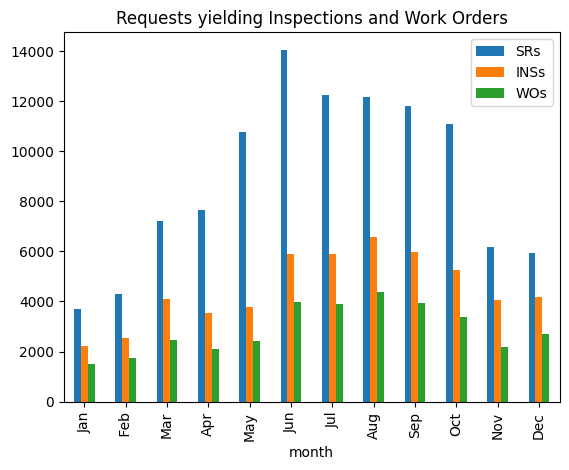

In [24]:
df_SR_yield_WO.plot(x="month", y=["SRs", 'INSs', "WOs"], kind="bar")
plt.title('Requests yielding Inspections and Work Orders')

## Inspection Results by Risk

In [25]:
risk_colors = mcolors.LinearSegmentedColormap.from_list('color_gradient', ['tomato','gold','palegreen'], 5)
risk_colors = [mcolors.rgb2hex(risk_colors(i)) for i in range(risk_colors.N)]
risk_ratings = ["A", "B", "C", "D", "E"]
d2c = dict(zip(risk_ratings, risk_colors))

In [26]:
# new comlumn coding the risk rating:  Risk ratings of 12 - 11 are priority A, 10 is priority B, 9 is priority C, and 8 - 3 are priority D
mergeddf['RiskRating'].fillna(0, inplace=True)
risk_encoding_map = {12: 'A', 11: 'A', 10: 'B', 9: 'C'}
for i in range(3, 9):
    risk_encoding_map[i] = 'D'
for i in range(0, 3):
    risk_encoding_map[i] = 'E'

# Define a function to apply the mapping to each row
def map_priority(row):
    # risk_rating = row['RiskRating']
    priority = np.where(row in risk_encoding_map, risk_encoding_map[row], 'Unknown')
    return priority

# Apply the function to each row of the DataFrame
mergeddf['Risk_coded'] = mergeddf['RiskRating'].apply(map_priority)

In [27]:
mergeddf['InsCreatedDate'] = pd.to_datetime(mergeddf['InsCreatedDate'],errors='coerce')
mergeddf['InsCreatedDate_month'] = mergeddf['InsCreatedDate'].apply(lambda row: row.month)
INS_group_by_month = mergeddf.groupby('InsCreatedDate_month').size()
# INS_group_by_month

In [28]:
df_ins_by_risk

RiskRating,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,month
SRCreated_month,,,,,,,,,,,
1,67.0,85.0,133.0,282.0,367.0,372.0,313.0,36.0,3.0,NaN,Jan
2,100.0,87.0,124.0,321.0,528.0,570.0,379.0,75.0,2.0,8.0,Feb
3,185.0,196.0,180.0,473.0,830.0,786.0,535.0,125.0,24.0,5.0,Mar
4,185.0,140.0,224.0,558.0,773.0,762.0,433.0,72.0,11.0,1.0,Apr
5,266.0,236.0,338.0,799.0,1170.0,1048.0,728.0,132.0,23.0,NaN,May
6,309.0,259.0,426.0,1120.0,1608.0,1672.0,1001.0,194.0,23.0,2.0,Jun
7,293.0,190.0,333.0,948.0,1581.0,1570.0,828.0,174.0,20.0,14.0,Jul
8,295.0,192.0,390.0,1049.0,1689.0,1759.0,930.0,186.0,32.0,9.0,Aug
9,226.0,118.0,281.0,940.0,1639.0,1870.0,1082.0,174.0,32.0,5.0,Sep


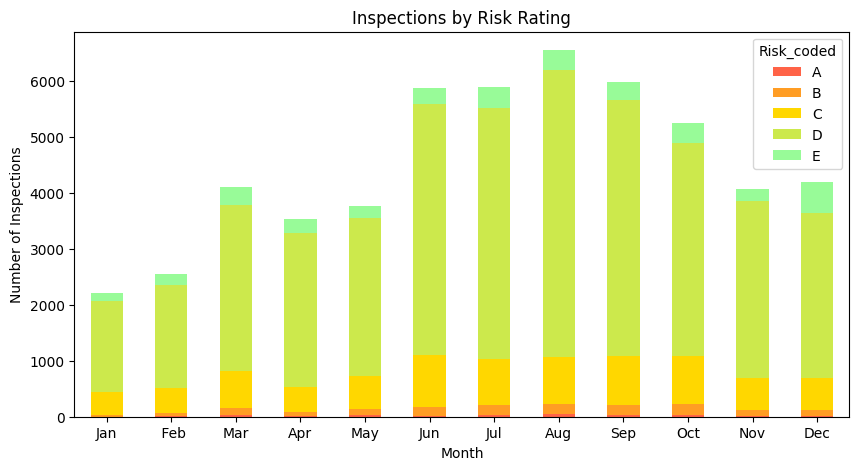

In [29]:
# plot the data hue by Risk_coded 
df_ins_by_risk = mergeddf[['InspectionDate','Risk_coded','InsCreatedDate_month']]
df_ins_by_risk = df_ins_by_risk.groupby(['InsCreatedDate_month', 'Risk_coded']).size().unstack()

df_ins_by_risk['month'] = ['Jan' ,' Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# df_ins_by_risk.plot(kind='bar', stacked=True)

# plot stacked bar chart x-axis: month, y-axis: number of inspections, hue: risk rating
ax = df_ins_by_risk.plot.bar(x='month', y=['A','B','C','D','E'], rot=0, stacked=True, color=risk_colors, figsize=(10,5))

# title
plt.title('Inspections by Risk Rating')

# x-axis label
plt.xlabel('Month')

# y-axis label
plt.ylabel('Number of Inspections')

plt.show()


codng colors/ in orders

## Inspection Yielding by WO

In [30]:
mergeddf['InsGlobalID'].replace('-', np.nan, inplace=True)

In [31]:
mergeddf['InsCreatedDate'] = pd.to_datetime(mergeddf['InsCreatedDate'],errors='coerce')
mergeddf['InsCreatedDate_month'] = mergeddf['InsCreatedDate'].apply(lambda row: row.month)

In [32]:
INS_group_by_month = mergeddf.groupby('InsCreatedDate_month').size()
# WO_group_by_month = mergeddf.groupby('WOCreatedDate_month').size()
df_INS_yield_WO = pd.DataFrame({'INSs': INS_group_by_month, 'WOs': WO_group_by_month})
df_INS_yield_WO['month'] = ['Jan' ,' Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df_INS_yield_WO['percent'] = df_INS_yield_WO['WOs']/df_INS_yield_WO['INSs']

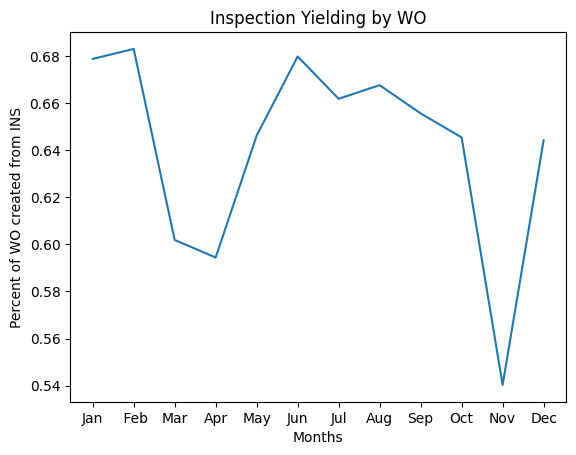

In [33]:
# plot percent of WO created from INS line chart
x = df_INS_yield_WO['month']
y1 = df_INS_yield_WO['percent']

# create a figure and axis object
fig, ax1 = plt.subplots()

# plot the first line on the first y-axis
ax1.plot(x, y1, label='Percent of WO created from INS')
ax1.set_ylabel('Percent of WO created from INS')
ax1.set_xlabel('Months')

# show the plot
plt.title('Inspection Yielding by WO')
plt.show()


## Work Orders Completed Weekly

In [34]:
# turnn WOClosedDate into datetime
mergeddf['WOClosedDate'] = pd.to_datetime(mergeddf['WOClosedDate'],errors='coerce')
mergeddf["WOClosedDate_week_number"] = mergeddf["WOClosedDate"].dt.week
mergeddf.groupby(['WOClosedDate_week_number']).size()

/var/folders/3f/0w5y80cn6wj986lwfb84fv540000gn/T/ipykernel_21960/282788310.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  mergeddf["WOClosedDate_week_number"] = mergeddf["WOClosedDate"].dt.week


WOClosedDate_week_number
1.0     464
2.0     470
3.0     429
4.0     387
5.0     276
6.0     231
7.0     126
8.0     227
9.0     137
10.0    381
11.0    194
12.0    213
13.0    114
14.0    206
15.0    151
16.0    266
17.0    149
18.0    167
19.0    220
20.0    339
21.0    321
22.0    253
23.0    329
24.0    270
25.0    459
26.0    401
27.0    267
28.0    413
29.0    342
30.0    535
31.0    450
32.0    372
33.0    295
34.0    448
35.0    439
36.0    432
37.0    640
38.0    408
39.0    392
40.0    638
41.0    330
42.0    475
43.0    440
44.0    372
45.0     99
46.0    365
47.0    280
48.0    608
49.0    456
50.0    530
51.0    572
52.0    486
dtype: int64

In [35]:
priority_encoding_map = {12: 'A', 11: 'A', 10: 'B', 8: 'C', 9: 'C'}
for i in range(3, 9):
    risk_encoding_map[i] = 'D'
for i in range(0, 3):
    risk_encoding_map[i] = 'E'


# Apply the function to each row of the DataFrame
mergeddf['WOPriority'].fillna(0, inplace=True)
mergeddf['Priority_coded'] = mergeddf['WOPriority'].apply(map_priority)

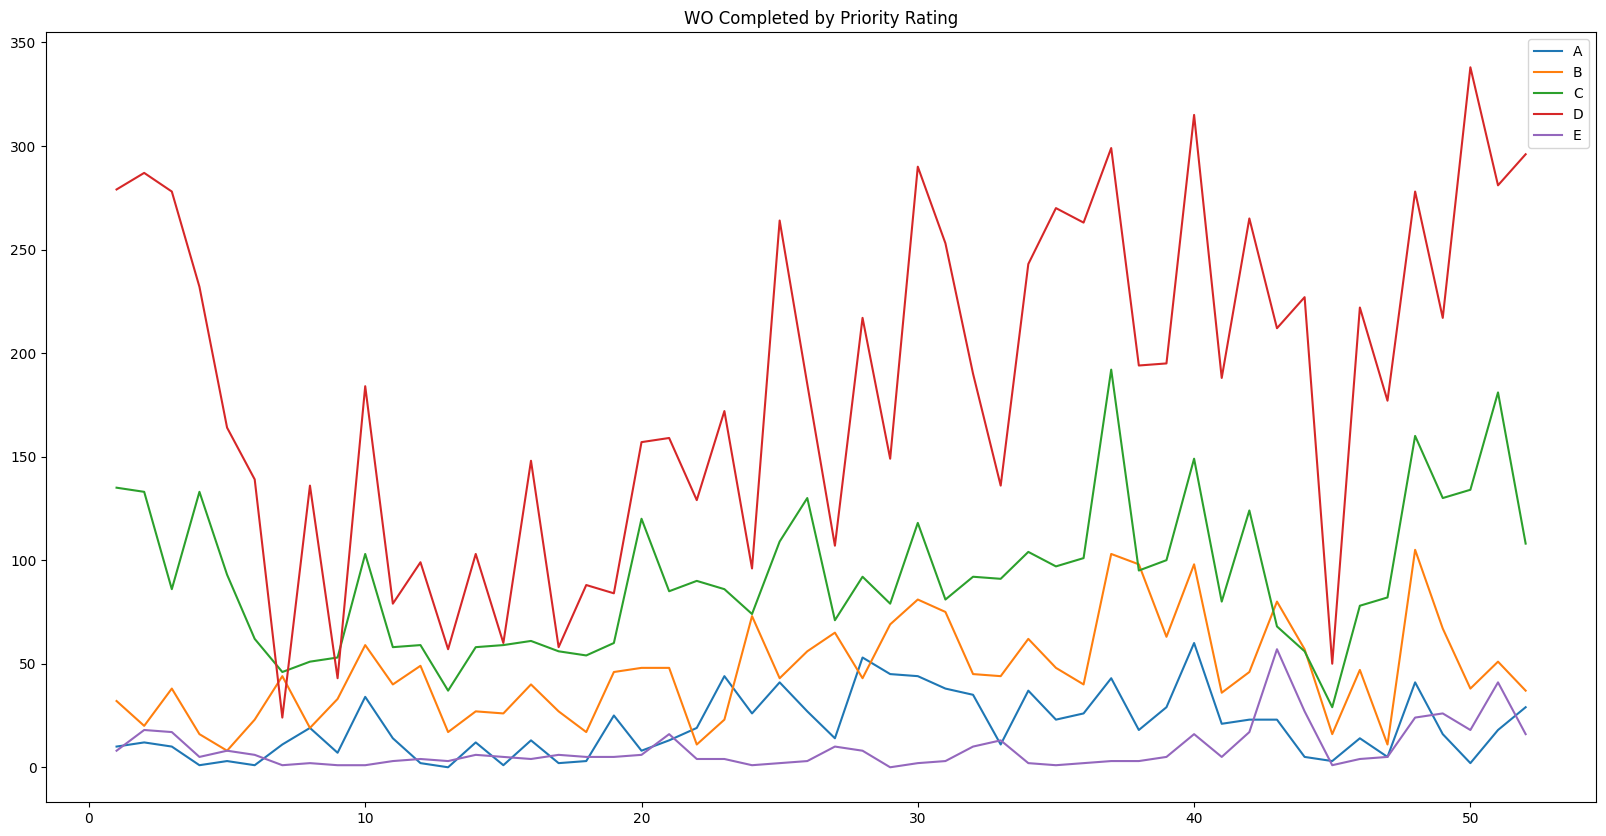

In [36]:
# plot the data hue by Priority_coded 
wo_completed_weekly = mergeddf[['WOClosedDate_week_number','WOPriority','Priority_coded']]
wo_completed_weekly = wo_completed_weekly.groupby(['WOClosedDate_week_number', 'Priority_coded']).size().unstack()
wo_completed_weekly.reset_index(inplace=True)
wo_completed_weekly.fillna(0, inplace=True)
ax = plt.subplot()
# change fig size to 20, 10
fig = plt.gcf()
fig.set_size_inches(20, 10)

ax.plot(wo_completed_weekly["WOClosedDate_week_number"], wo_completed_weekly["A"])
ax.plot(wo_completed_weekly["WOClosedDate_week_number"], wo_completed_weekly["B"])
ax.plot(wo_completed_weekly["WOClosedDate_week_number"], wo_completed_weekly["C"])
ax.plot(wo_completed_weekly["WOClosedDate_week_number"], wo_completed_weekly["D"])
ax.plot(wo_completed_weekly["WOClosedDate_week_number"], wo_completed_weekly["E"])

plt.legend(['A',  'B', 'C','D','E' ])
plt.title('WO Completed by Priority Rating')
plt.show()

In [78]:
wo_completed_weekly

Priority_coded,WOClosedDate_week_number,A,B,C,D,E
0,1.0,10.0,32.0,135.0,279.0,8.0
1,2.0,12.0,20.0,133.0,287.0,18.0
2,3.0,10.0,38.0,86.0,278.0,17.0
3,4.0,1.0,16.0,133.0,232.0,5.0
4,5.0,3.0,8.0,93.0,164.0,8.0
5,6.0,1.0,23.0,62.0,139.0,6.0
6,7.0,11.0,44.0,46.0,24.0,1.0
7,8.0,19.0,19.0,51.0,136.0,2.0
8,9.0,7.0,33.0,53.0,43.0,1.0
9,10.0,34.0,59.0,103.0,184.0,1.0


## Pending WOs by Type

In [37]:
df = mergeddf[mergeddf['WOStatus'] == 'Pending']

In [38]:
# encode TOType column with label encoder
df['WOType'].replace('Canopy Reduction', 'Other', inplace=True)
df['WOType'].replace('Limb Down', 'Other', inplace=True)
df['WOType'].replace('Misc Work', 'Other', inplace=True)
df['WOType'].replace('Pest & Disease Treatment', 'Other', inplace=True)

df['WOType'].replace('Rescue/Preservation - Space', 'Other', inplace=True)
df['WOType'].replace('Stump Removal', 'Other', inplace=True)
df['WOType'].replace('Stump Removal for Tree Planting', 'Other', inplace=True)

df['WOType'].replace('Tree Plant-Street Tree', 'Tree Plant', inplace=True)
df['WOType'].replace('Tree Plant-Street Tree Block', 'Tree Plant', inplace=True)

df['WOType'].replace('Tree Removal for Tree Planting', 'Tree Removal', inplace=True)

/var/folders/3f/0w5y80cn6wj986lwfb84fv540000gn/T/ipykernel_21960/3792168824.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['WOType'].replace('Canopy Reduction', 'Other', inplace=True)
/var/folders/3f/0w5y80cn6wj986lwfb84fv540000gn/T/ipykernel_21960/3792168824.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['WOType'].replace('Limb Down', 'Other', inplace=True)
/var/folders/3f/0w5y80cn6wj986lwfb84fv540000gn/T/ipykernel_21960/3792168824.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs

In [39]:
df.groupby(['WOCreatedDate_month', 'WOType']).size()

# convert to dataframe
df = pd.DataFrame(df.groupby(['WOCreatedDate_month', 'WOType']).size().unstack())
df['month'] = ['Jan' ,' Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df.fillna(0, inplace=True)

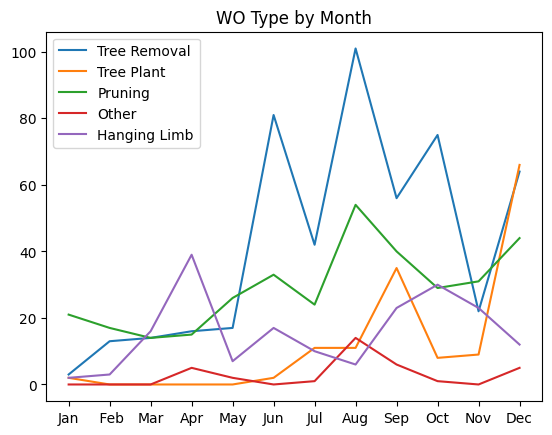

In [40]:
# plot the data of WOType by month
ax = plt.subplot()
# change fig size to 20, 10
# fig = plt.gcf()
# fig.set_size_inches(, 10)

ax.plot(df['month'], df["Tree Removal"])
ax.plot(df['month'], df["Tree Plant"])
ax.plot(df['month'], df["Pruning"])
ax.plot(df['month'], df["Other"])
ax.plot(df['month'], df["Hanging Limb"])

plt.legend(['Tree Removal', 'Tree Plant','Pruning', 'Other', 'Hanging Limb'])
plt.title('WO Type by Month')
plt.show()


replace na w/ 0

# Risk results by Type (# Count)

In [41]:
#map risk rating into letters
def map_rating(rating):
    if (pd.isna(rating)):
        return 'E'
    if (rating == 12 or rating == 11):
        return 'A'
    if (rating == 10):
        return 'B'
    if (rating == 9):
        return 'C'
    return 'D'

dp_copy["RiskRating"] = dp_copy['RiskRating'].apply(map_rating)

In [42]:
grouped = dp_copy.groupby(["SRCategory", "RiskRating"]).size()

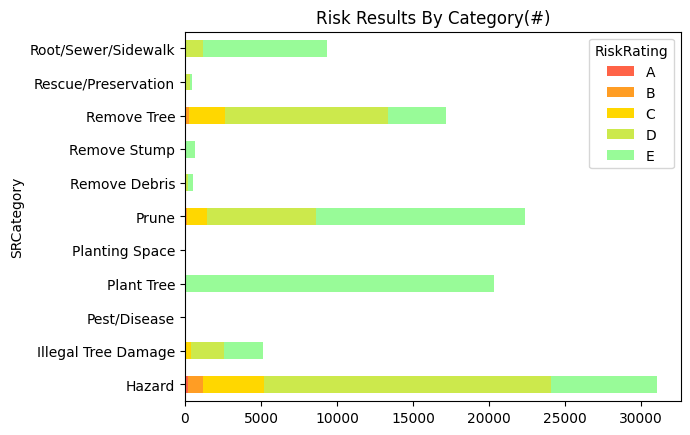

In [43]:
#Risk results by Type
stacked = grouped.unstack()
stacked.plot(kind='barh', stacked="True", color = risk_colors)
plt.title("Risk Results By Category(#)")
plt.show()

# Risk Results by Type(%)

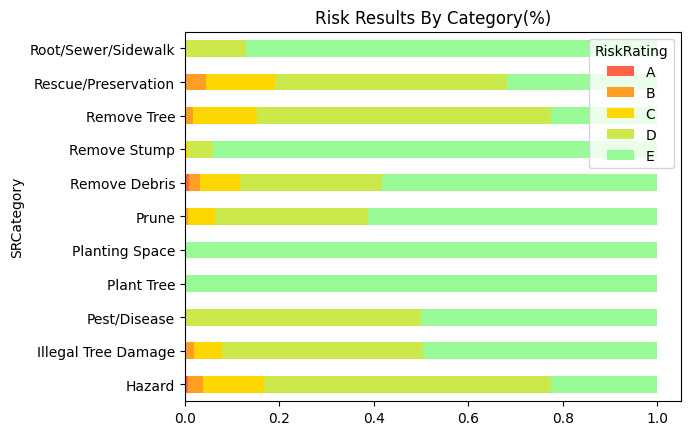

In [44]:
#Risk Results by Type %
total_count = stacked.sum(axis=1)
stacked_proportion = stacked.div(total_count, axis = 0)
stacked_proportion.plot(kind='barh', stacked = True, color = risk_colors)
plt.title("Risk Results By Category(%)")
plt.show()

# Risk Results by source

In [45]:
grouped_source = dp_copy.groupby(["SRSource", "RiskRating"]).size()

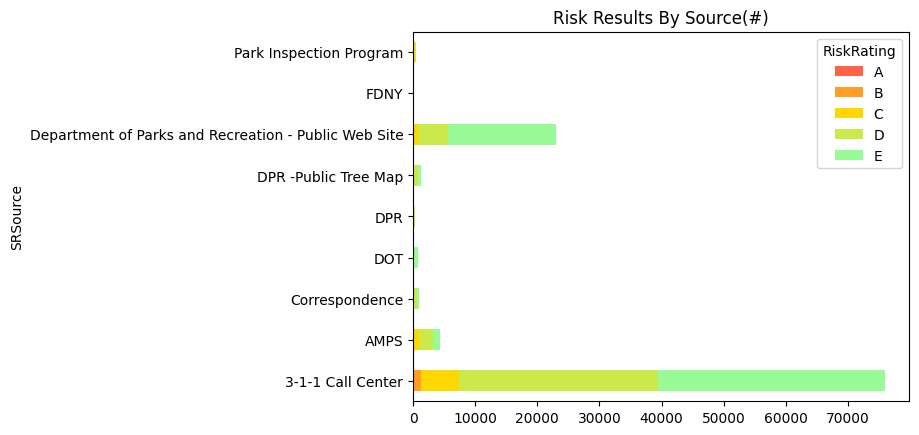

In [46]:
#Risk results by source
stacked = grouped_source.unstack()
stacked.plot(kind='barh', stacked="True", color = risk_colors)
plt.title("Risk Results By Source(#)")
plt.show()

# WO Yield by SRType (%)

In [47]:
#Create a new column to determine whether a work order is created
dp_copy['wo_attached'] = dp_copy["WorkOrderGlobalID"].apply(lambda x: type(x) is str)

In [48]:
colors_boolean = ["tomato", "palegreen"]

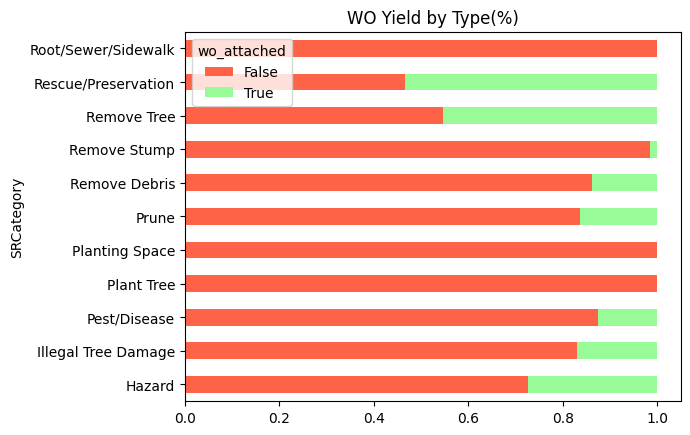

In [49]:
#WO Yield by SRType(%)
grouped = dp_copy.groupby(["SRCategory", "wo_attached"]).size()
stacked = grouped.unstack()
total_count = stacked.sum(axis=1)
stacked_proportion = stacked.div(total_count, axis = 0)
stacked_proportion.plot(kind='barh', stacked = True, color = colors_boolean)
plt.title("WO Yield by Type(%)")
plt.show()

# WOs by SR Category

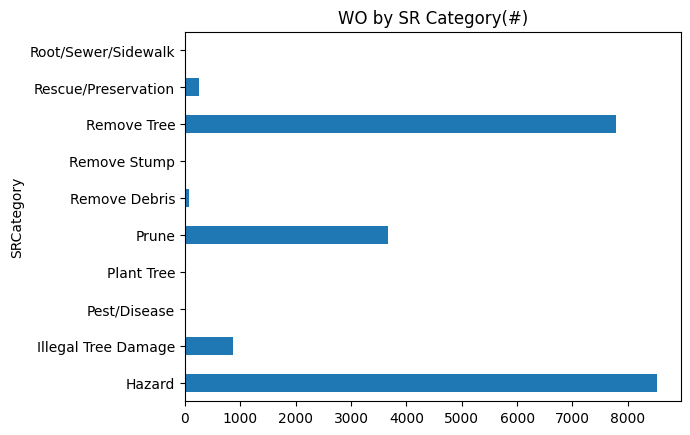

In [50]:
dp_wo = dp_copy[dp_copy['wo_attached'] == True]
grouped = dp_wo.groupby("SRCategory").size()
grouped.plot(kind = 'barh')
plt.title("WO by SR Category(#)")
plt.show()

# Borough Stats

### SRCreated each month by borough

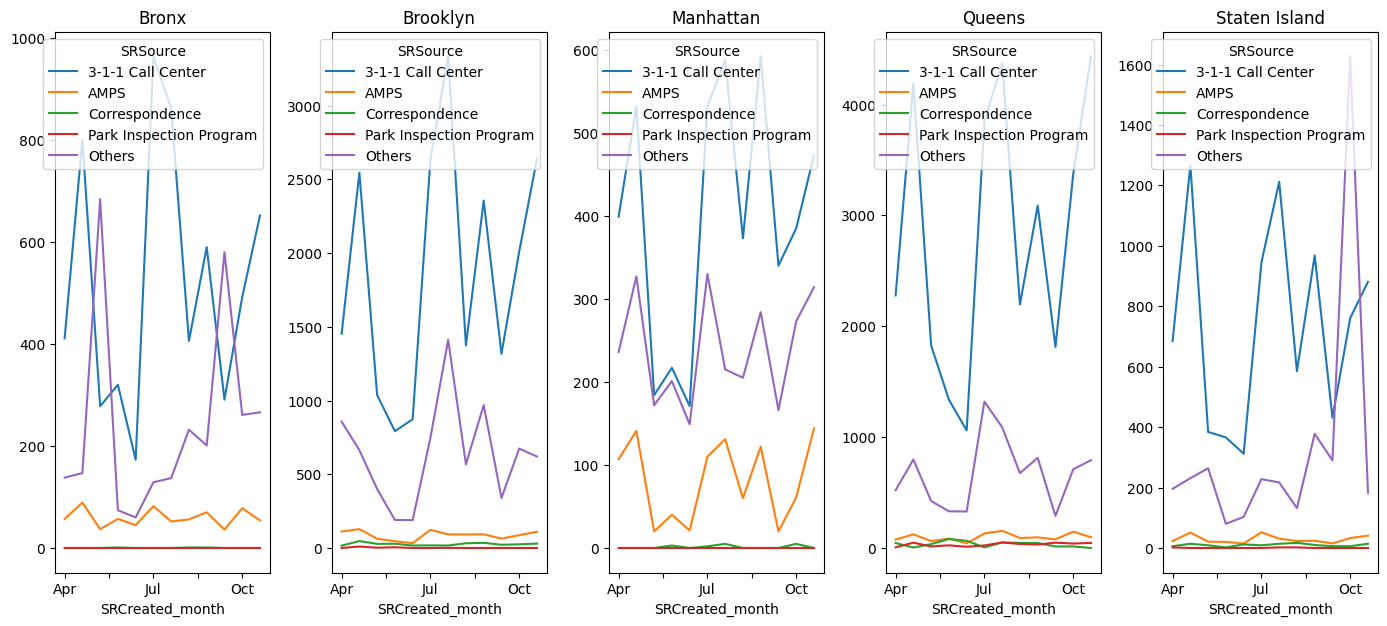

In [51]:
df_borough = mergeddf.copy()

df_borough.SRCreated_month = df_borough.SRCreated_month.apply(lambda x: calendar.month_abbr[x])
df_borough = df_borough.groupby(['BoroughCode', 'SRCreated_month', 'SRSource']).size().unstack(level=2)

df_borough['Others'] = df_borough[['DOT','DPR','DPR -Public Tree Map','Department of Parks and Recreation - Public Web Site','FDNY']].sum(axis=1)
df_borough.fillna(0, inplace=True)
df_borough.drop(['DOT','DPR','DPR -Public Tree Map','Department of Parks and Recreation - Public Web Site','FDNY'], axis=1, inplace=True)

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(14, 6))
fig.tight_layout()
axes_iter = iter(axes)

# plot for each borough and month
for borough in df_borough.index.levels[0]:
    try:
        ax = next(axes_iter)
    except StopIteration:
        break

    df_borough.loc[(borough)].plot(ax = ax)
    ax.set_title(borough)
plt.show()


In [76]:
df_borough.to_csv('df_borough.csv')

### Service Requests by Category for each borough

In [52]:
grouped = dp_copy.groupby(["SRCategory", "BoroughCode"]).size().unstack()

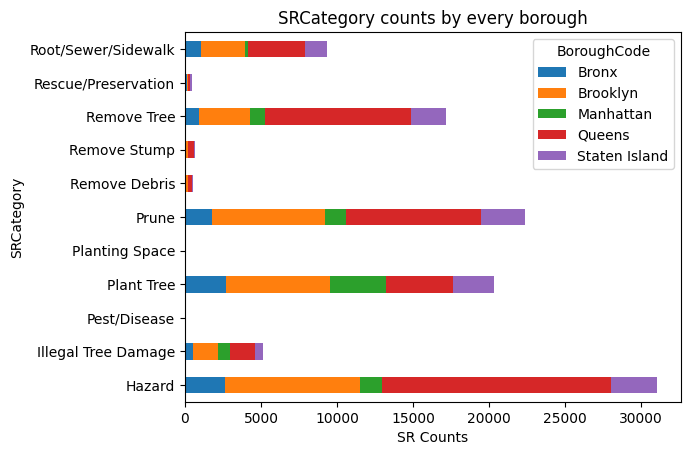

In [53]:
ax = grouped.plot(kind='barh', stacked=True)
ax.set_xlabel("SR Counts")
ax.set_ylabel('SRCategory')
ax.set_title('SRCategory counts by every borough')

plt.show()

### Risk Results by Category for each borough

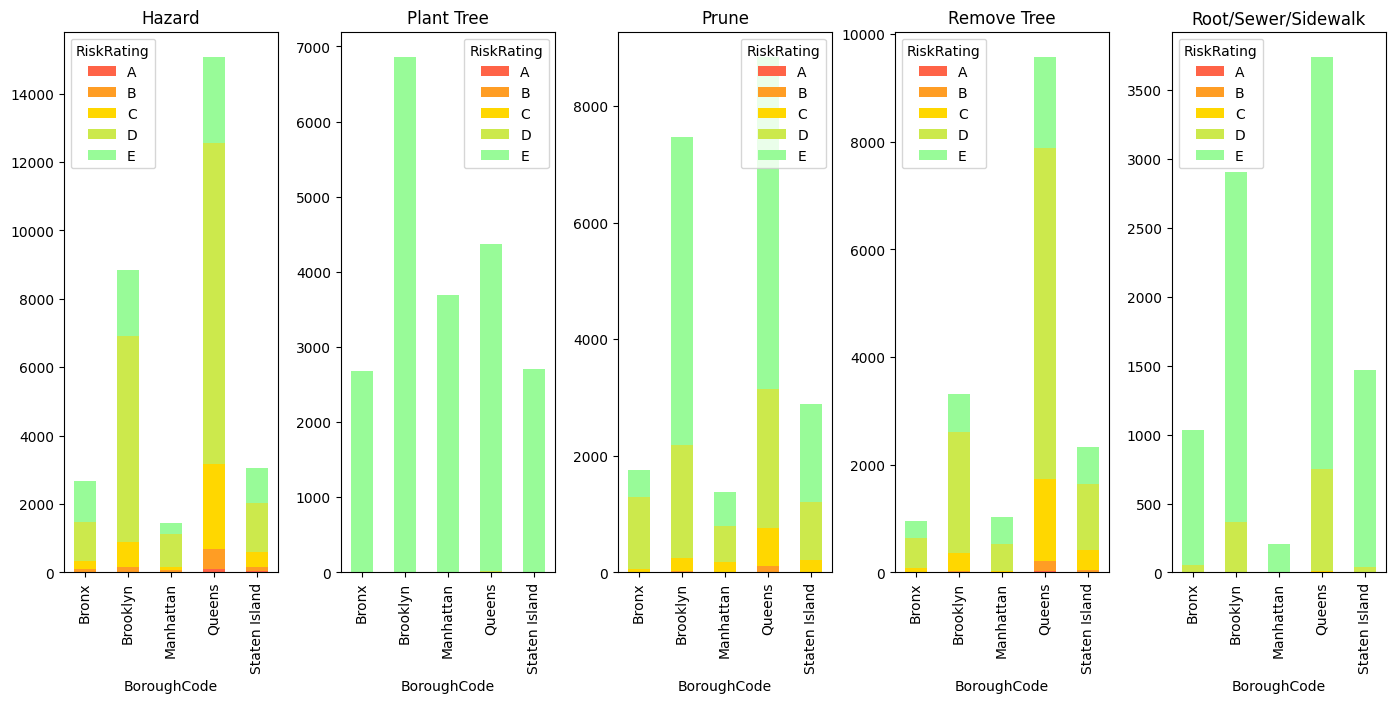

In [54]:
#drop rows with no borough information
dp_copy2 = dp_copy[dp_copy["BoroughCode"].notna()]
grouped = dp_copy2.groupby(["SRCategory"])

#only keep few categories to keep graph readable
keep_keys = ['Hazard', 'Prune', 'Plant Tree','Remove Tree', 'Root/Sewer/Sidewalk']


#stacked bar graph grouped by borough
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(14, 6))
fig.tight_layout()
axes_iter = iter(axes)

for i in grouped.groups:
    if not i in keep_keys:
        continue
    try:
        ax = next(axes_iter)
    except StopIteration:
        break
    borough_group = grouped.get_group(i)
    stacked_group = borough_group.groupby(["BoroughCode","RiskRating"]).size().unstack()
    stacked_group.plot(kind='bar', stacked = True, color = d2c, ax=ax)
    ax.set_title(i)
plt.show()

### SR Source by Borough

In [55]:
grouped = dp_copy.groupby(["SRSource", "BoroughCode"]).size().unstack()


<Figure size 1400x1400 with 0 Axes>

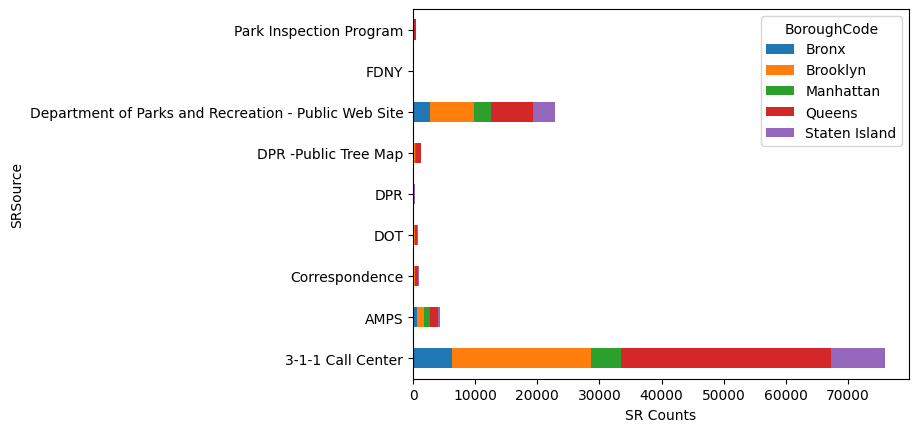

In [56]:
fig = plt.figure(figsize=(14, 14))

ax = grouped.plot(kind='barh', stacked=True)
ax.set_xlabel("SR Counts")
ax.set_ylabel('SRSource')

plt.show()

### WO yields by borough

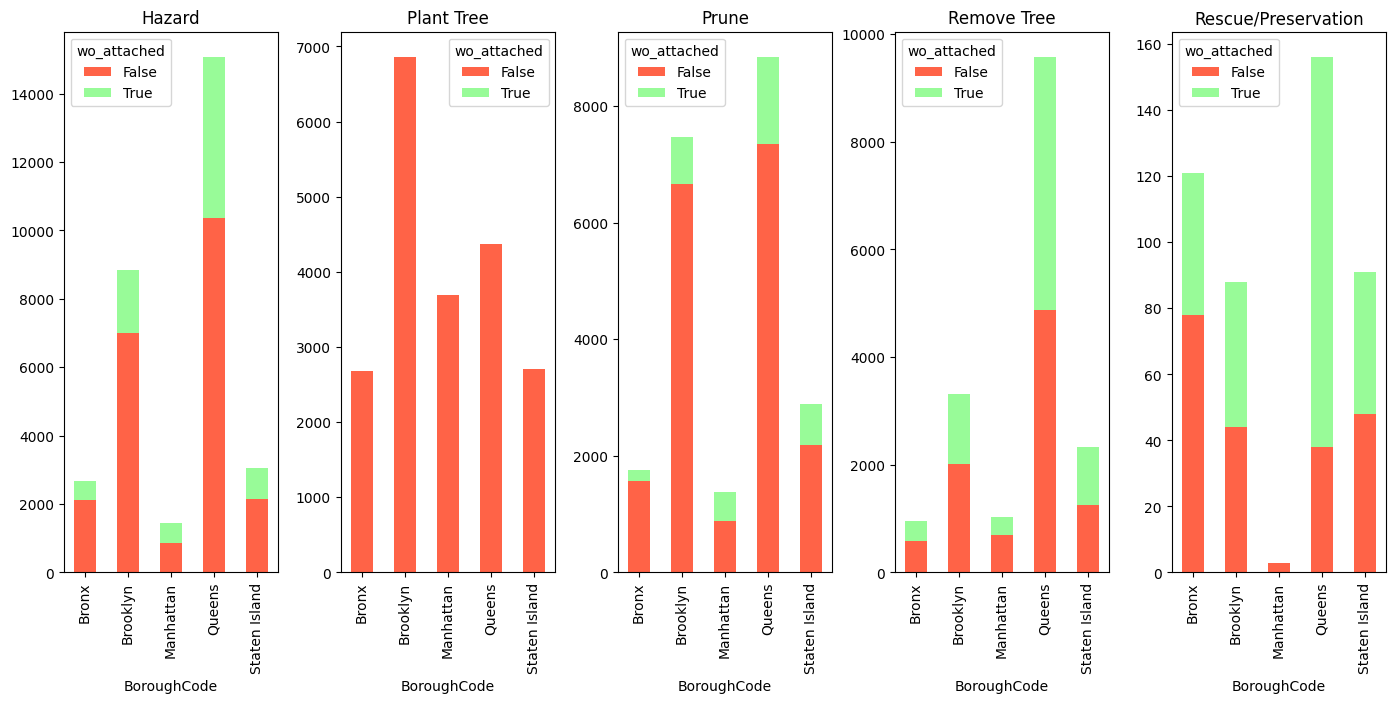

In [57]:
grouped = dp_copy2.groupby(["SRCategory"])

#only keep few categories to keep graph readable
keep_keys = ['Hazard', 'Prune', 'Plant Tree','Remove Tree', 'Rescue/Preservation']

#stacked bar graph grouped by borough
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(14, 6))
fig.tight_layout()
axes_iter = iter(axes)

for i in grouped.groups:
    if (not i in keep_keys):
        continue
    try:
        ax = next(axes_iter)
    except StopIteration:
        break
    borough_group = grouped.get_group(i)
    stacked_group = borough_group.groupby(["BoroughCode","wo_attached"]).size().unstack()
    stacked_group.plot(kind='bar', stacked = True, color = colors_boolean, ax=ax)
    ax.set_title(i)
plt.show()

### WOs Completed Type

In [58]:
dp_copy['WOStatus'].value_counts()

Closed        16708
Open          14714
Cancel         1912
Pending        1218
In Process      106
Alternate        84
Name: WOStatus, dtype: int64

In [59]:
dp_wo_completed = dp_copy[dp_copy['WOStatus'] == 'Closed']


In [60]:
# encode TOType column with label encoder
dp_wo_completed['WOType'].replace('Canopy Reduction', 'Other', inplace=True)
dp_wo_completed['WOType'].replace('Limb Down', 'Other', inplace=True)
dp_wo_completed['WOType'].replace('Misc Work', 'Other', inplace=True)
dp_wo_completed['WOType'].replace('Pest & Disease Treatment', 'Other', inplace=True)

dp_wo_completed['WOType'].replace('Rescue/Preservation - Space', 'Other', inplace=True)
dp_wo_completed['WOType'].replace('Stump Removal', 'Other', inplace=True)
dp_wo_completed['WOType'].replace('Stump Removal for Tree Planting', 'Other', inplace=True)

dp_wo_completed['WOType'].replace('Tree Plant-Street Tree', 'Tree Plant', inplace=True)
dp_wo_completed['WOType'].replace('Tree Plant-Street Tree Block', 'Tree Plant', inplace=True)

dp_wo_completed['WOType'].replace('Tree Removal for Tree Planting', 'Tree Removal', inplace=True)

/var/folders/3f/0w5y80cn6wj986lwfb84fv540000gn/T/ipykernel_21960/1838684947.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dp_wo_completed['WOType'].replace('Canopy Reduction', 'Other', inplace=True)
/var/folders/3f/0w5y80cn6wj986lwfb84fv540000gn/T/ipykernel_21960/1838684947.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dp_wo_completed['WOType'].replace('Limb Down', 'Other', inplace=True)
/var/folders/3f/0w5y80cn6wj986lwfb84fv540000gn/T/ipykernel_21960/1838684947.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pan

In [61]:
dp_wo_completed['WOType'].value_counts()

Tree Removal                  5018
Other                         4788
Hanging Limb                  2282
Tree Down                     1998
Pruning                       1971
Prune-Traffic 10 Day           236
Prune-Traffic 20 Day           146
Tree Plant                     115
Block Pruning                   66
Misc Wood                       40
Tree and Sidewalk Repair        26
Rescue/Preservation - Tree      22
Name: WOType, dtype: int64

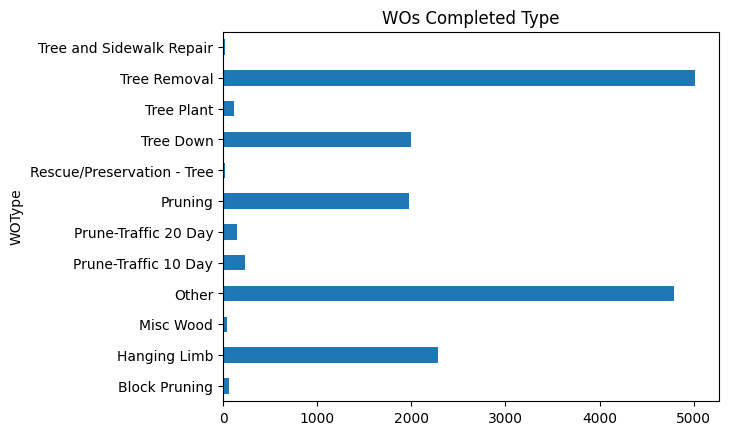

In [62]:
grouped = dp_wo_completed.groupby("WOType").size()
grouped.plot(kind = 'barh', )
plt.title("WOs Completed Type")
plt.show()

### WOs Completed Type by Priority

In [63]:
dp_wo_completed['RiskRating'].value_counts()

D    9777
C    3406
E    1932
B    1335
A     258
Name: RiskRating, dtype: int64

In [64]:
grouped = dp_wo_completed.groupby(["WOType", "RiskRating"]).size()

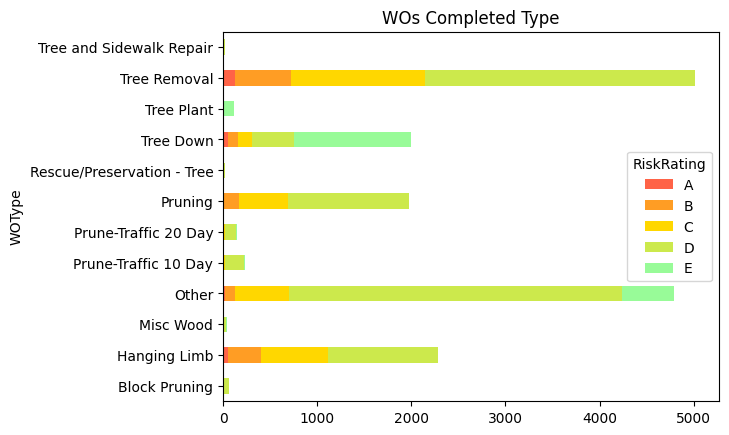

In [65]:
stacked = grouped.unstack()
stacked.plot(kind = 'barh', stacked="True", color=risk_colors)
plt.title("WOs Completed Type")
plt.show()

### WOs Completed Risk Priority

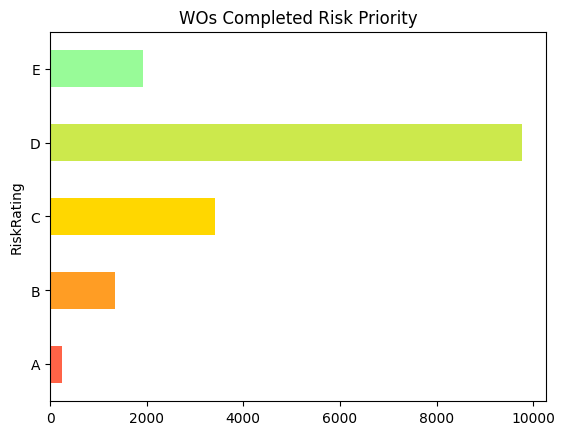

In [66]:
grouped = dp_wo_completed.groupby("RiskRating").size()
grouped.plot(kind = 'barh', color=risk_colors)
plt.title("WOs Completed Risk Priority")
plt.show()

### WOs Pending Type

In [67]:
dp_wo_pending = dp_copy[dp_copy['WOStatus'] == 'Pending']

In [68]:
# encode TOType column with label encoder
dp_wo_pending['WOType'].replace('Canopy Reduction', 'Other', inplace=True)
dp_wo_pending['WOType'].replace('Limb Down', 'Other', inplace=True)
dp_wo_pending['WOType'].replace('Misc Work', 'Other', inplace=True)
dp_wo_pending['WOType'].replace('Pest & Disease Treatment', 'Other', inplace=True)

dp_wo_pending['WOType'].replace('Rescue/Preservation - Space', 'Other', inplace=True)
dp_wo_pending['WOType'].replace('Stump Removal', 'Other', inplace=True)
dp_wo_pending['WOType'].replace('Stump Removal for Tree Planting', 'Other', inplace=True)

dp_wo_pending['WOType'].replace('Tree Plant-Street Tree', 'Tree Plant', inplace=True)
dp_wo_pending['WOType'].replace('Tree Plant-Street Tree Block', 'Tree Plant', inplace=True)

dp_wo_pending['WOType'].replace('Tree Removal for Tree Planting', 'Tree Removal', inplace=True)

/var/folders/3f/0w5y80cn6wj986lwfb84fv540000gn/T/ipykernel_21960/2428117810.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dp_wo_pending['WOType'].replace('Canopy Reduction', 'Other', inplace=True)
/var/folders/3f/0w5y80cn6wj986lwfb84fv540000gn/T/ipykernel_21960/2428117810.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dp_wo_pending['WOType'].replace('Limb Down', 'Other', inplace=True)
/var/folders/3f/0w5y80cn6wj986lwfb84fv540000gn/T/ipykernel_21960/2428117810.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.

In [69]:
dp_wo_pending['WOType'].value_counts()

Tree Removal    504
Pruning         348
Hanging Limb    188
Tree Plant      144
Other            34
Name: WOType, dtype: int64

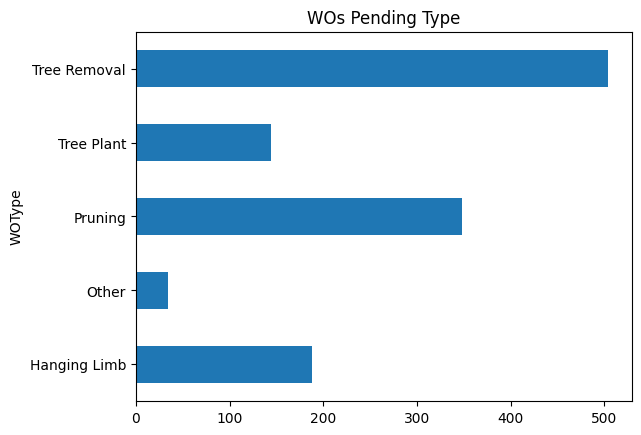

In [70]:
grouped = dp_wo_pending.groupby("WOType").size()
grouped.plot(kind = 'barh', )
plt.title("WOs Pending Type")
plt.show()

### WOs Pending Type by Priority

In [71]:
dp_wo_pending['RiskRating'].value_counts()

D    659
C    364
E    154
B     35
A      6
Name: RiskRating, dtype: int64

In [72]:
grouped = dp_wo_pending.groupby(["WOType", "RiskRating"]).size()

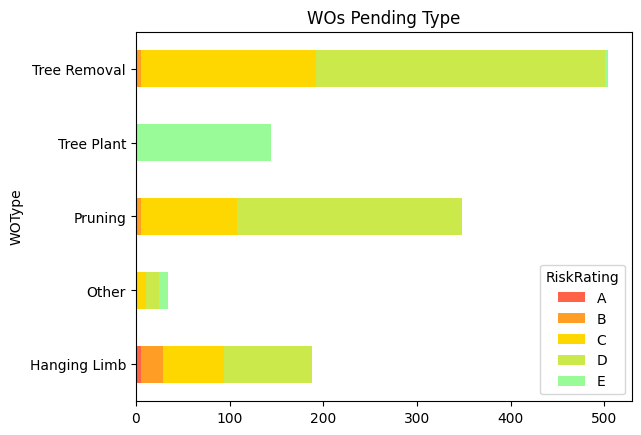

In [73]:
stacked = grouped.unstack()
stacked.plot(kind = 'barh', stacked="True", color=risk_colors)
plt.title("WOs Pending Type")
plt.show()

### WOs Pending Risk Priority

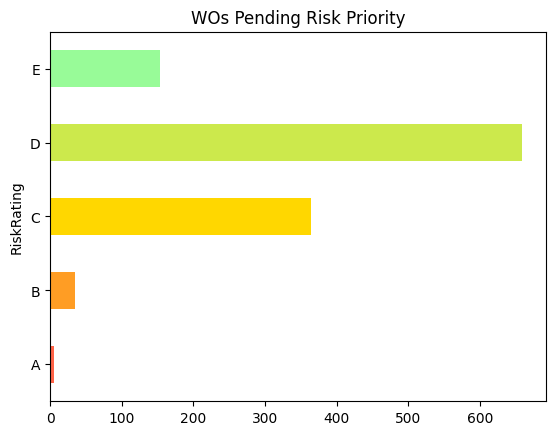

In [74]:
grouped = dp_wo_pending.groupby("RiskRating").size()
grouped.plot(kind = 'barh', color=risk_colors)
plt.title("WOs Pending Risk Priority")
plt.show()